In [1]:
# data loading
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("./sample_data/PCA.csv")

In [4]:
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,y
0,0.417138,-1.293612,-1.059303,-1.059527,0.381752,-0.430310,-0.307272,1.385823,0.589694,1.666701,...,6.527110,0.087006,-1.621985,-0.629728,2.651207,0.530446,-0.314525,0.842460,0.015583,1
1,-1.368996,-0.139701,-2.064799,0.337200,0.641051,-0.117311,0.473875,-1.071846,1.654553,0.056524,...,-13.584169,-0.375729,3.853924,0.777111,0.513734,0.088397,0.328591,1.062251,0.801070,0
2,1.935372,-1.312181,1.279396,-0.957400,0.847323,-0.500160,-1.132685,-2.781463,-1.545594,0.472310,...,1.035900,-0.133146,1.131425,0.515137,-0.553069,0.159660,-1.549426,0.164657,2.101127,1
3,-0.856339,0.328385,0.643745,-0.328504,-0.381893,-0.626916,0.539573,1.016995,0.873047,-0.455808,...,0.804224,-0.049558,4.160305,-0.581075,0.212196,-1.553463,-1.842163,-0.977414,-1.173794,1
4,1.182037,0.527509,-1.604039,-0.193111,-0.989075,-0.442528,-0.339171,-0.253943,2.228942,-0.495958,...,-1.023770,-1.479795,0.338839,-1.903866,-0.158133,0.960149,-0.047209,-0.572708,0.143018,1


In [6]:
# Using PCA to reduce the size of the feature space while retaining 90% of the explained variance.
from sklearn.decomposition import PCA
X = data.drop(columns=['y'])
y = data['y']

pca = PCA(n_components=0.95)
pca.fit(X)
X_r = pca.transform(X)

In [7]:
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# find number of principal components that explain at least 95% of the variance
num_components = np.argmax(cumulative_var_ratio >= 0.95) + 1

# transform data to reduced feature space
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(data)

In [8]:
print("Original data shape:", data.shape)
print("Reduced data shape:", reduced_data.shape)

Original data shape: (1000, 201)
Reduced data shape: (1000, 156)


In [9]:
pca.n_components_

156

In [10]:
# Train two SVM model from sklearn.svm.SVC with kernel 'rbf', gamma = 'auto', and C = 10. Target column is y.
# Model 1 trained on original data (after scaling)
# Model 2 trained on the dataset obtained after PCA with 130 components
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',C=10))
clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto'))])

In [12]:
y_pred=clf.predict(X_test)

In [13]:
#Record f1 score
from sklearn.metrics import confusion_matrix,f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 weighted score:", f1)
#and confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

F1 weighted score: 0.8247238157268468
Confusion matrix:
 [[87 14]
 [21 78]]


In [14]:
X_trn, X_tst, y_trn, y_tst = train_test_split(reduced_data, y, test_size=0.2, random_state=142)

In [15]:
clf1 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',C=10))
clf1.fit(X_trn,y_trn)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto'))])

In [16]:
y_pred1=clf1.predict(X_tst)
f1_1 = f1_score(y_tst, y_pred1, average='weighted')
print("F1 weighted score:", f1_1)
#and confusion matrix
cm_1 = confusion_matrix(y_tst, y_pred1)
print("Confusion matrix:\n", cm_1)

F1 weighted score: 0.8697393483709274
Confusion matrix:
 [[92  9]
 [17 82]]


In [18]:
# The f1 score is higher for the second model. The true Negatives have increased in the second model while the number of positives remained same.

In [19]:
# Train H2O GLRM model on the input dataset (minus column y)
#
#

In [20]:
!pip install h2o
import h2o
from h2o.estimators import H2OGeneralizedLowRankEstimator

h2o.init()
h2o.no_progress()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.1-py2.py3-none-any.whl size=249152215 sha256=47a75bb8f039a51a3b614180197a4539a85361ed53862664bbe7055189a60fc1
  Stored in directory: /root/.cache/pip/wheels/2e/2f/04/ef0554c89bcb5d38a6fc082a87f497933109faefd94dcdc3d2
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpe0vkydrx
  JVM stdout: /tmp/tmpe0vkydrx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpe0vkydrx/h2o_unknownUser_star

H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_diqeeb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [24]:
dt = h2o.import_file("./sample_data/PCA.csv")
dt.head()

col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199
0.417138,-1.29361,-1.0593,-1.05953,0.381752,-0.43031,-0.307272,1.38582,0.589694,1.6667,1.31147,1.19195,0.0649472,-1.41523,1.31451,-1.73622,-0.38714,1.44643,0.346575,-0.61984,2.21896,-0.398524,-0.506723,-0.409402,0.142797,0.273736,0.498196,-1.60552,-0.0312061,-0.749582,-0.811901,-0.93747,0.153438,2.07482,0.589689,-0.672951,-0.429152,-0.000545631,0.0293349,0.269769,-1.20069,-0.308039,0.609292,0.466339,-0.203195,-1.7998,-0.457277,-0.701985,-0.47369,-3.79211,0.457003,-0.089994,0.635649,0.447822,-0.811163,2.83709,-0.359703,-0.228304,2.68294,0.899582,0.0522253,3.67576,-1.57586,1.08158,-5.35521,-1.31571,-0.295899,-1.00273,-0.76341,-0.904252,-0.137978,-1.13504,1.73701,0.393659,0.23234,0.0490588,-0.997949,-3.95493,-0.107809,0.524602,1.55345,0.364169,0.467647,0.12826,-8.47787,-1.12686,-0.29369,0.494578,-1.83754,0.206772,-0.763123,-0.328998,0.313047,1.77867,0.483358,0.365726,0.657645,0.896576,-1.10321,0.433558,-0.604027,-1.45953,1.80421,0.382048,0.843025,-0.426941,0.551774,0.41839,1.50518,0.497636,-0.0346946,-0.00895392,0.432747,1.6363,-1.02813,-1.09865,-0.370883,1.71875,1.05752,-1.56342,1.59186,0.0591166,1.49491,-1.55973,-1.30868,0.771517,-0.00979843,1.03383,1.97851,-0.564011,0.479221,-0.0708604,-0.851853,1.14327,-4.58542,0.730273,0.0286885,0.769356,0.402913,0.537292,0.621774,1.72451,-0.731938,0.00118317,-1.01384,1.32217,0.612437,1.55546,0.420927,-0.805546,-1.77725,-2.30479,-0.8484,0.506869,-0.339288,0.988474,0.56794,-0.548534,0.81615,-0.943872,0.670743,-2.89349,-0.747136,-1.6222,1.55332,-0.333615,0.201438,0.57891,0.455273,-0.529282,0.604571,-6.14462,1.00213,0.780659,0.479004,-1.94406,-1.0756,-0.651431,1.78583,-1.92977,1.28509,-1.65101,-1.27104,-0.460941,-0.497611,2.28597,-1.54522,0.199028,0.883517,-1.26812,-2.26559,6.52711,0.0870059,-1.62198,-0.629728,2.65121,0.530446,-0.314525,0.84246,0.0155829
-1.369,-0.139701,-2.0648,0.3372,0.641051,-0.117311,0.473875,-1.07185,1.65455,0.0565242,-0.300712,-0.155206,-0.676662,-0.309092,0.0901343,0.530625,1.07687,-0.24656,0.0799048,1.00401,-1.74874,1.0031,0.673671,0.00665693,-0.0530958,-1.18786,-1.55426,-0.697532,1.03012,-0.00168115,1.23842,0.0617427,0.587774,6.14549,0.834936,-0.908335,0.677951,-1.15879,1.53422,-0.979048,0.333034,0.670469,0.686321,1.1182,0.577974,-0.943833,0.3573,0.769239,-0.244336,5.43751,0.276127,-0.281579,1.60508,1.52715,-0.0640792,2.15572,0.389426,1.73057,-0.856551,-0.59393,1.95597,3.97041,1.01396,-1.47155,3.5503,0.759449,0.184685,-0.00930667,-0.749277,-0.300029,0.0503845,0.289825,0.544543,-0.124044,0.187229,1.61693,-0.1

In [25]:
dataX=dt.drop('y')
y_tr=dt['y']

In [26]:
model = H2OGeneralizedLowRankEstimator(k=2,model_id = "rank2", seed = 1234,
                                             loss="Absolute",
                                             transform="standardize",
                                             representation_name="rank2_full")
model.train(training_frame=dataX, x=dataX.columns)

Model Details
=============
H2OGeneralizedLowRankEstimator : Generalized Low Rank Modeling
Model Key: rank2


Model Summary: 
    number_of_iterations    final_step_size    final_objective_value
--  ----------------------  -----------------  -----------------------
    200                     8.95522e-05        157717

ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 196953.21772035197
Misclassification Error (Categorical): 0.0

Scoring History: 
     timestamp            duration    iterations    step_size               objective
---  -------------------  ----------  ------------  ----------------------  ------------------
     2023-07-21 05:25:36  1.344 sec   0.0           1.05                    159462.71856860918
     2023-07-21 05:25:37  1.460 sec   1.0           1.1025                  159384.68453678046
     2023-07-21 05:25:37  1.589 sec   2.0           1.1576250000000001      159298.33471297158
     2023-07-21 05:25:37  1.729 sec   3.0           1.2155062500000002      159276.80324599554
     2023-07-21 05:25:37  1.844 sec   4.0           0.8103375000000002      159276.80324599554
     2023-07-21 05:25:37  1.907 sec   5.0           0.8508543750000002      158798.73541122768
     2023-07-21 05:25:37  1.990 sec   6.0           0.8933970937500002      158563.80318487313
     2023-07-21 05:25:37  2.046 sec   7.0           0.9380669484375003      158528.2781015284
     2023-07-21 05:25:37  2.088 sec   8.0           0.6253779656250001      158528.2781015284
     2023-07-21 05:25:37  2.139 sec   9.0           0.6566468639062502      158275.63761909705
---  ---                  ---         ---           ---                     ---
     2023-07-21 05:25:45  9.915 sec   190.0         0.00022553521154239147  157716.5795739884
     2023-07-21 05:25:45  9.947 sec   191.0         0.00015035680769492766  157716.5795739884
     2023-07-21 05:25:45  9.983 sec   192.0         0.00015787464807967406  157716.5780181141
     2023-07-21 05:25:45  10.026 sec  193.0         0.00016576838048365777  157716.57742249954
     2023-07-21 05:25:45  10.055 sec  194.0         0.00017405679950784067  157716.57646353875
     2023-07-21 05:25:45  10.083 sec  195.0         0.0001827596394832327   157716.5758043958
     2023-07-21 05:25:45  10.118 sec  196.0         0.00012183975965548847  157716.5758043958
     2023-07-21 05:25:45  10.170 sec  197.0         0.0001279317476382629   157716.57478701137
     2023-07-21 05:25:45  10.201 sec  198.0         0.00013432833502017604  157716.57346964063
     2023-07-21 05:25:45  10.227 sec  199.0         8.955222334678402e-05   157716.57346964063
[200 rows x 6 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [27]:
X = h2o.get_frame("rank2_full")
Y = model.archetypes()

In [28]:
model.transform_frame(dataX).head()

Arch1,Arch2
0.675364,0.126606
-0.744989,0.162897
0.218486,0.107377
-0.268687,-0.268053
1.28619,1.44585
0.891003,1.03161
1.78045,0.897553
1.0238,0.582232
-0.488869,0.168784
0.623954,0.47082


In [29]:
archetypes_cols = model._model_json["output"]["archetypes"].as_data_frame().reset_index(drop=True).columns.to_list()
archetypes_y = pd.DataFrame({'Arch1':Y[0],'Arch2':Y[1], 'attribute':archetypes_cols[1:]})
archetypes_y.head(n=20)

,Arch1,Arch2,attribute
0,0.067340,-0.084983,col_0
1,0.065193,-0.123497,col_1
2,0.204717,-0.152098,col_2
3,-0.283952,0.351996,col_3
4,-0.103622,0.117302,col_4
5,0.066411,0.017768,col_5
6,0.015583,-0.015877,col_6
7,-0.615339,0.642226,col_7
8,-0.088711,0.032299,col_8
9,-0.021331,-0.008697,col_9


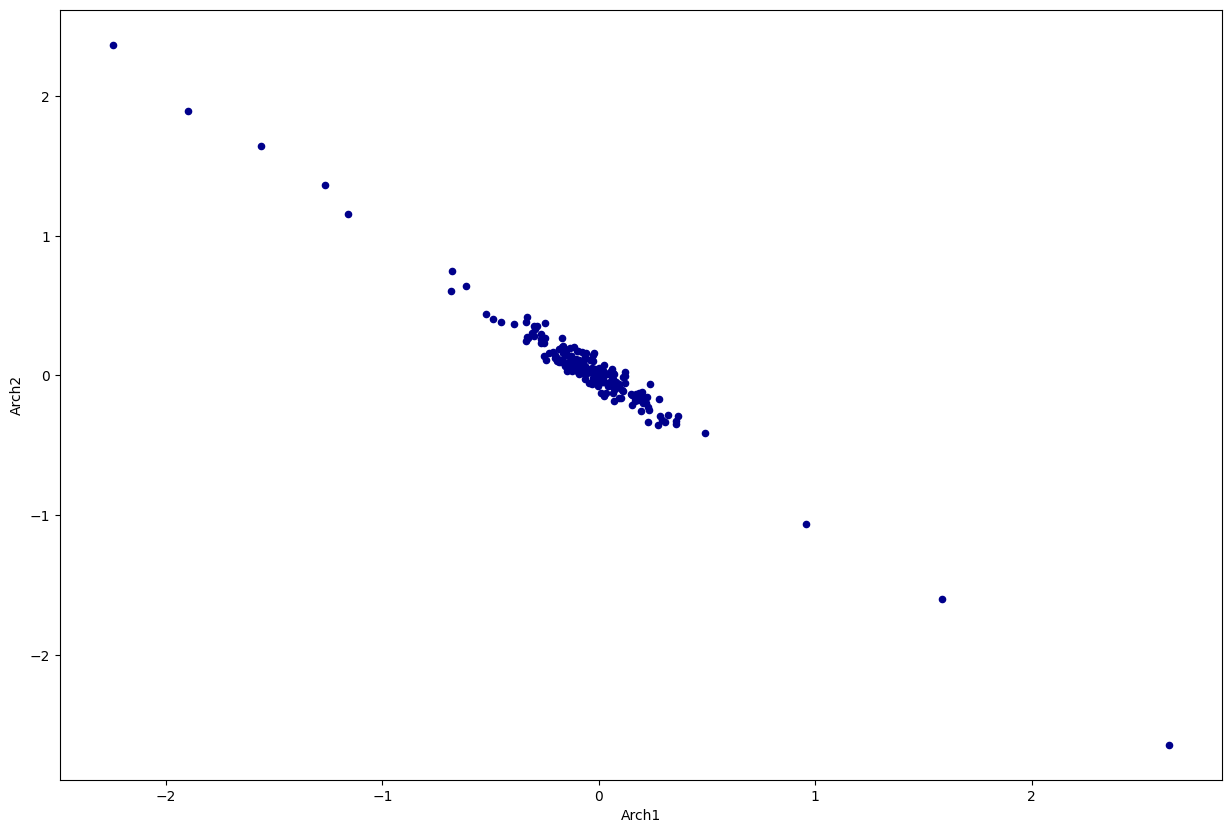

In [30]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as pl
import random

pl.rcParams['figure.figsize'] = [15, 10]

ax1 = archetypes_y.plot.scatter(x='Arch1',
                                y='Arch2',
                                c='DarkBlue')
for i, txt in enumerate(archetypes_cols[1:]):
    if txt in archetypes_y.columns:
        ax1.annotate(txt, (Y[0][i]+random.uniform(-0.2,0.2), Y[1][i]+random.uniform(-0.2,0.2)))